<h1 style="text-align: center;"><b>ML/SM Project</br>Pumpkin Seed</br></b></h1>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
file_path = r"C:\Users\sraja\Documents\NMIMS\SM\Project\Pumpkin_Seeds_Dataset.xlsx"
df = pd.read_excel(file_path)
df.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik

In [3]:
size = len(df)
columns = df.columns
n_columns = len(columns)
class_names = df["Class"]

print(f"Total Number of Columns : {n_columns}")
print(f"Total Number of Rows    : {size}")

Total Number of Columns : 13
Total Number of Rows    : 2500


<p style="font-size:50px">
<b>
EDA


<p style="font-size:25px">
<b>
Mean/Median/Mode


In [4]:
from tabulate import tabulate

columns = df.columns

# Calculate the mean, median, and mode for each independent variable
mean_values = np.round(df.loc[:, columns != "Class"].mean(), 3)
median_values = np.round(df.loc[:, columns != "Class"].median(), 3)
mode_values = np.round(df.loc[:, columns != "Class"].mode().iloc[0], 3)

# Create a DataFrame with the mean, median, and mode values
summary_df = pd.DataFrame(
    {
        "Mean": mean_values,
        "Median": median_values,
        "Mode": mode_values,
    }
)

# Print the summary table with tabulate and psql formatting
print("Summary Statistics for Independent Variables:")
print(tabulate(summary_df, headers="keys", tablefmt="psql", numalign="center"))

Summary Statistics for Independent Variables:
+-------------------+---------+----------+---------+
|                   |  Mean   |  Median  |  Mode   |
|-------------------+---------+----------+---------|
| Area              | 80658.2 |  79076   |  68063  |
| Perimeter         | 1130.28 | 1123.67  | 963.377 |
| Major_Axis_Length | 456.602 | 449.497  | 465.735 |
| Minor_Axis_Length | 225.795 | 224.703  | 220.685 |
| Convex_Area       | 81508.1 |  79872   |  76640  |
| Equiv_Diameter    | 319.334 | 317.305  | 294.382 |
| Eccentricity      |  0.861  |  0.864   |  0.85   |
| Solidity          |  0.989  |   0.99   |  0.99   |
| Extent            |  0.693  |  0.713   |  0.725  |
| Roundness         |  0.792  |  0.798   |  0.761  |
| Aspect_Ration     |  2.042  |  1.984   |  1.849  |
| Compactness       |  0.704  |  0.708   |  0.707  |
+-------------------+---------+----------+---------+


In [36]:
names = df["Class"].value_counts().index
values = df["Class"].value_counts()

fig = px.pie(names=names, values=values, title="Class Distribution", width=600)
fig.update_layout({"title": {"x": 0.5}})
fig.show()

<p style="font-size:25px">
<b>
Area


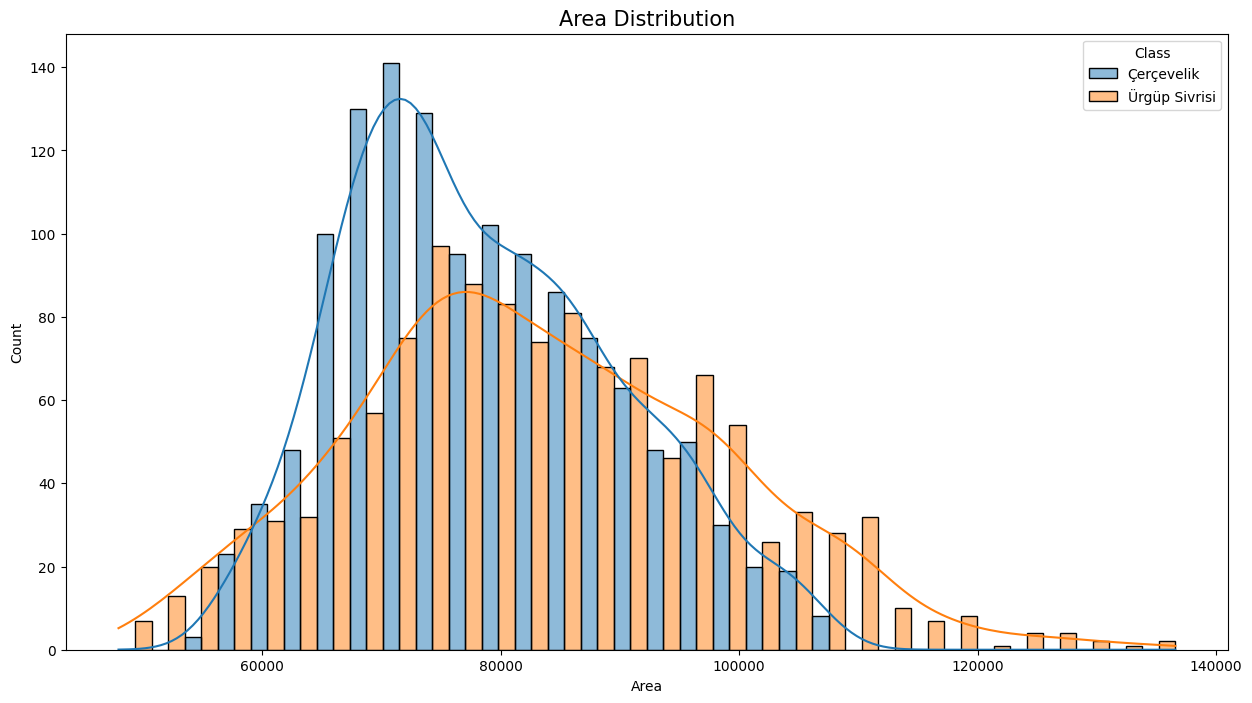

In [37]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x="Area", kde=True, hue="Class", multiple="dodge")
plt.title("Area Distribution", fontsize=15)
plt.show()

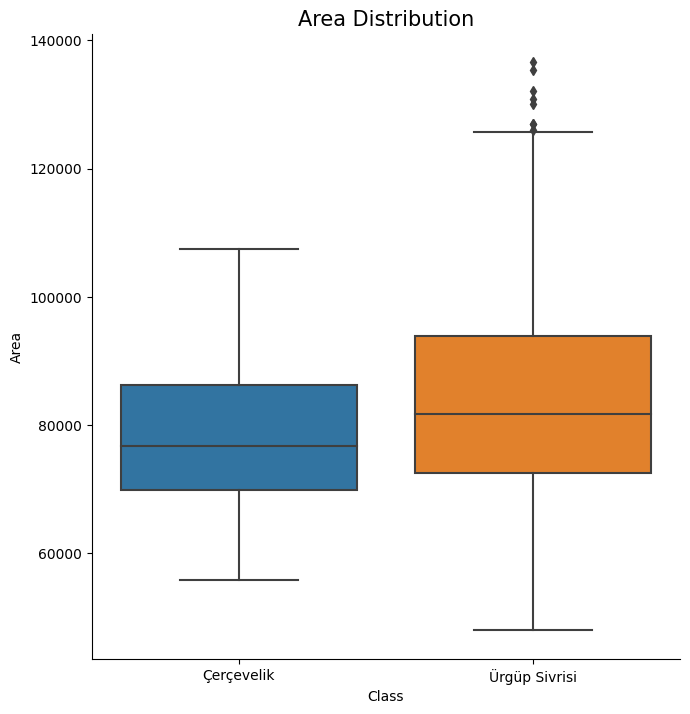

In [38]:
sns.catplot(data=df, y="Area", x="Class", kind="box", aspect=1, height=7)
plt.title("Area Distribution", fontsize=15)
plt.show()

<p style="font-size:20px">
If you notice carefully then the KDE shows us that the peak of both distributions is not at the same point. This shows are separation between both classes in terms of Area. In general we can say that:
</p>
<p style="font-size:20px">
Higher values of area belongs to the class Ürgüp Sivrisi
Lower values of area belongs to the class Çerçevelik
The Box plot confirms that there is a minor separation between both classes. And the Çerçevelik class is concentrated towards the lower values of Area whereas Ürgüp Sivrisi class is concentrated towards the higher values of Area.
</p>


<p style="font-size:25px">
<b>
Perimeter


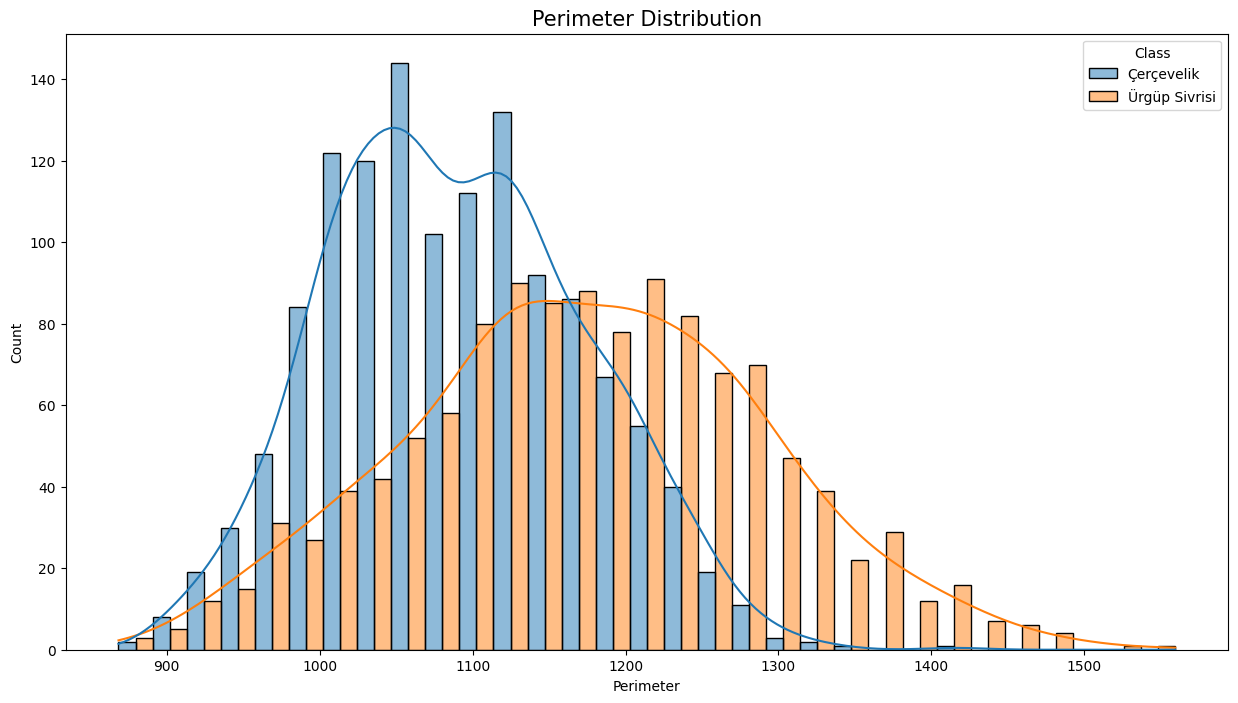

In [39]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x="Perimeter", kde=True, hue="Class", multiple="dodge")
plt.title("Perimeter Distribution", fontsize=15)
plt.show()

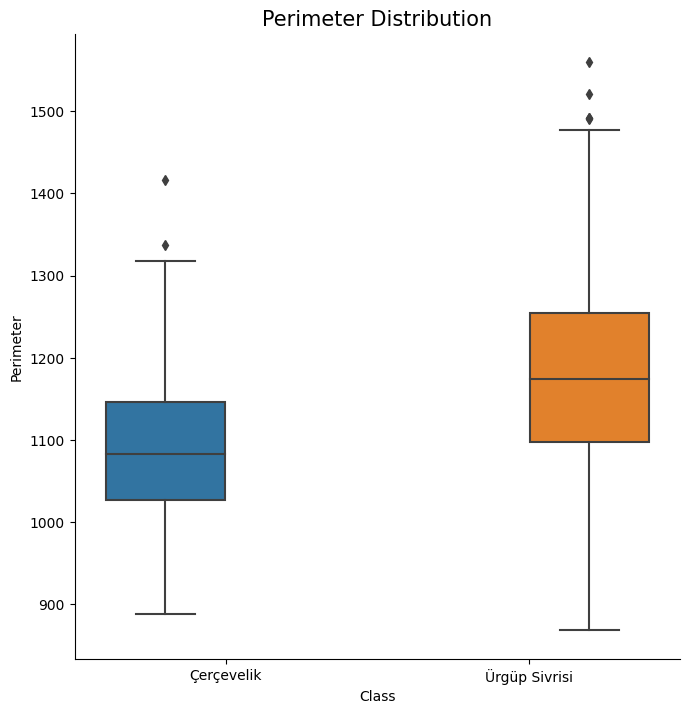

In [40]:
sns.catplot(
    data=df, y="Perimeter", x="Class", kind="box", aspect=1, height=7, hue="Class"
)


plt.title("Perimeter Distribution", fontsize=15)


plt.show()

<p style="font-size:20px">
Similar to the area distribution. Here, we can find a clear difference between both class distributions in terms of Perimeter. One more thing to notice is that Çerçevelik has two peaks, whereas Ürgüp Sivrisi has a flat peak.
</p>
<p style="font-size:20px">
The Box plot shows that this time the separation is much clear.
</p>


<p style="font-size:25px">
<b>
Eccentricity


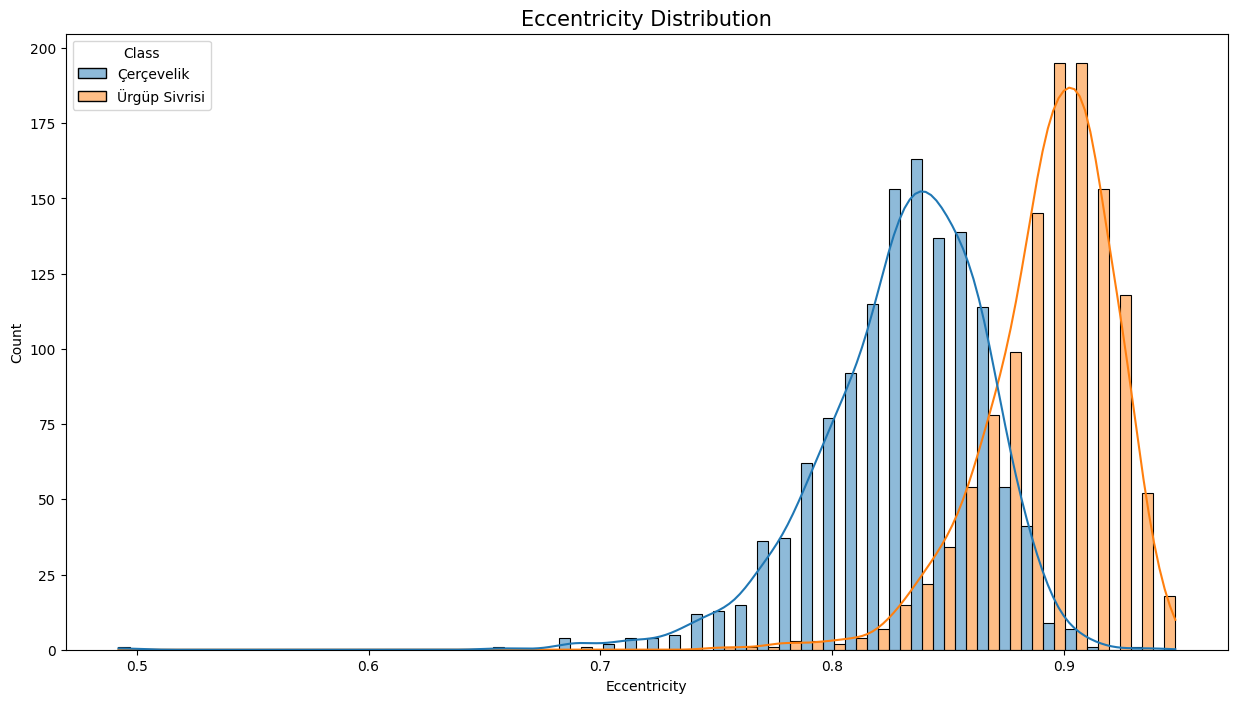

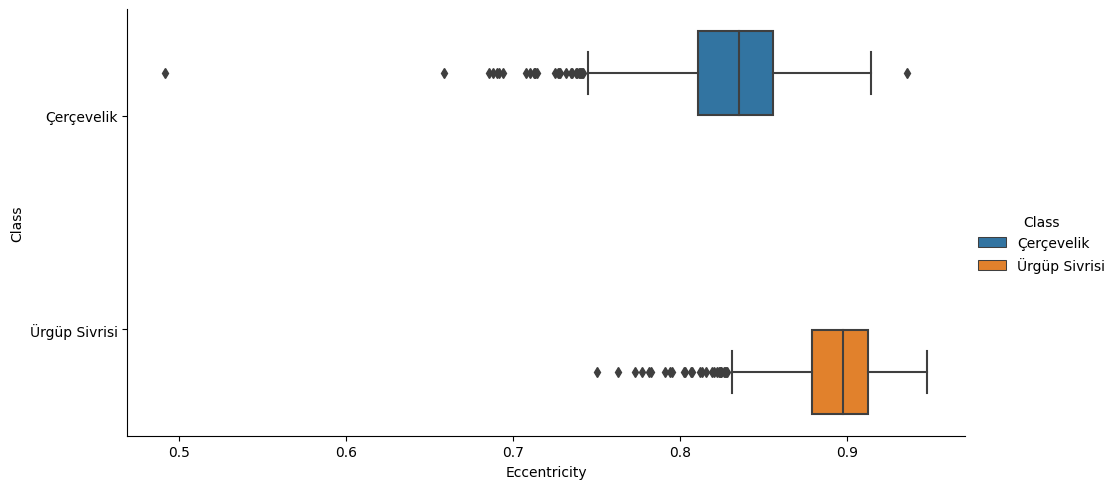

In [41]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='Eccentricity', kde=True,
             hue='Class', multiple='dodge')
plt.title("Eccentricity Distribution", fontsize=15)
plt.show()

sns.catplot(data=df, x='Eccentricity', y='Class',
            kind='box', aspect=2, height=5, hue='Class')
plt.show()

<p style="font-size:20px">
Both the distributions are well separated and in general, when one distribution ends the other starts(in terms of peaks).


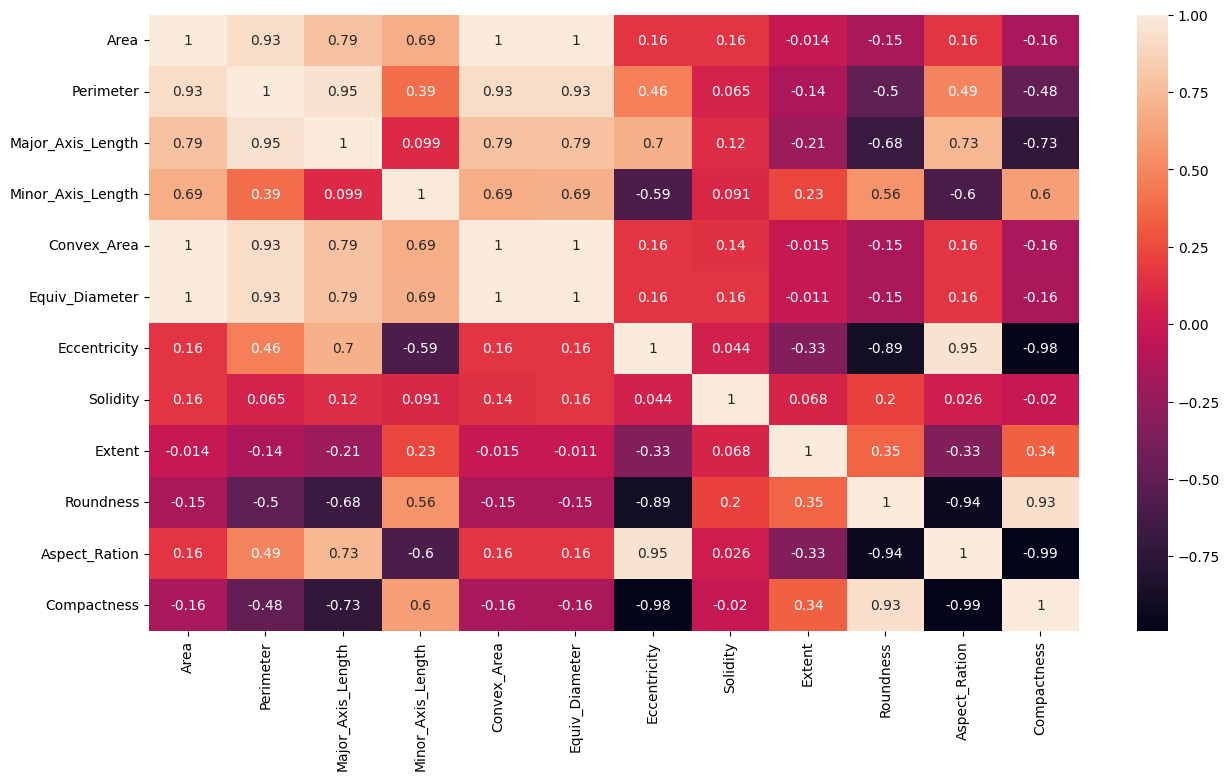

In [42]:
plt.figure(figsize=(15, 8))

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

<p style="font-size:20px">
<i>
Let's have a look at some of the most strongest correlations. many relations are highly positive like above 90, so we will focus on them.


<Figure size 1500x2000 with 0 Axes>

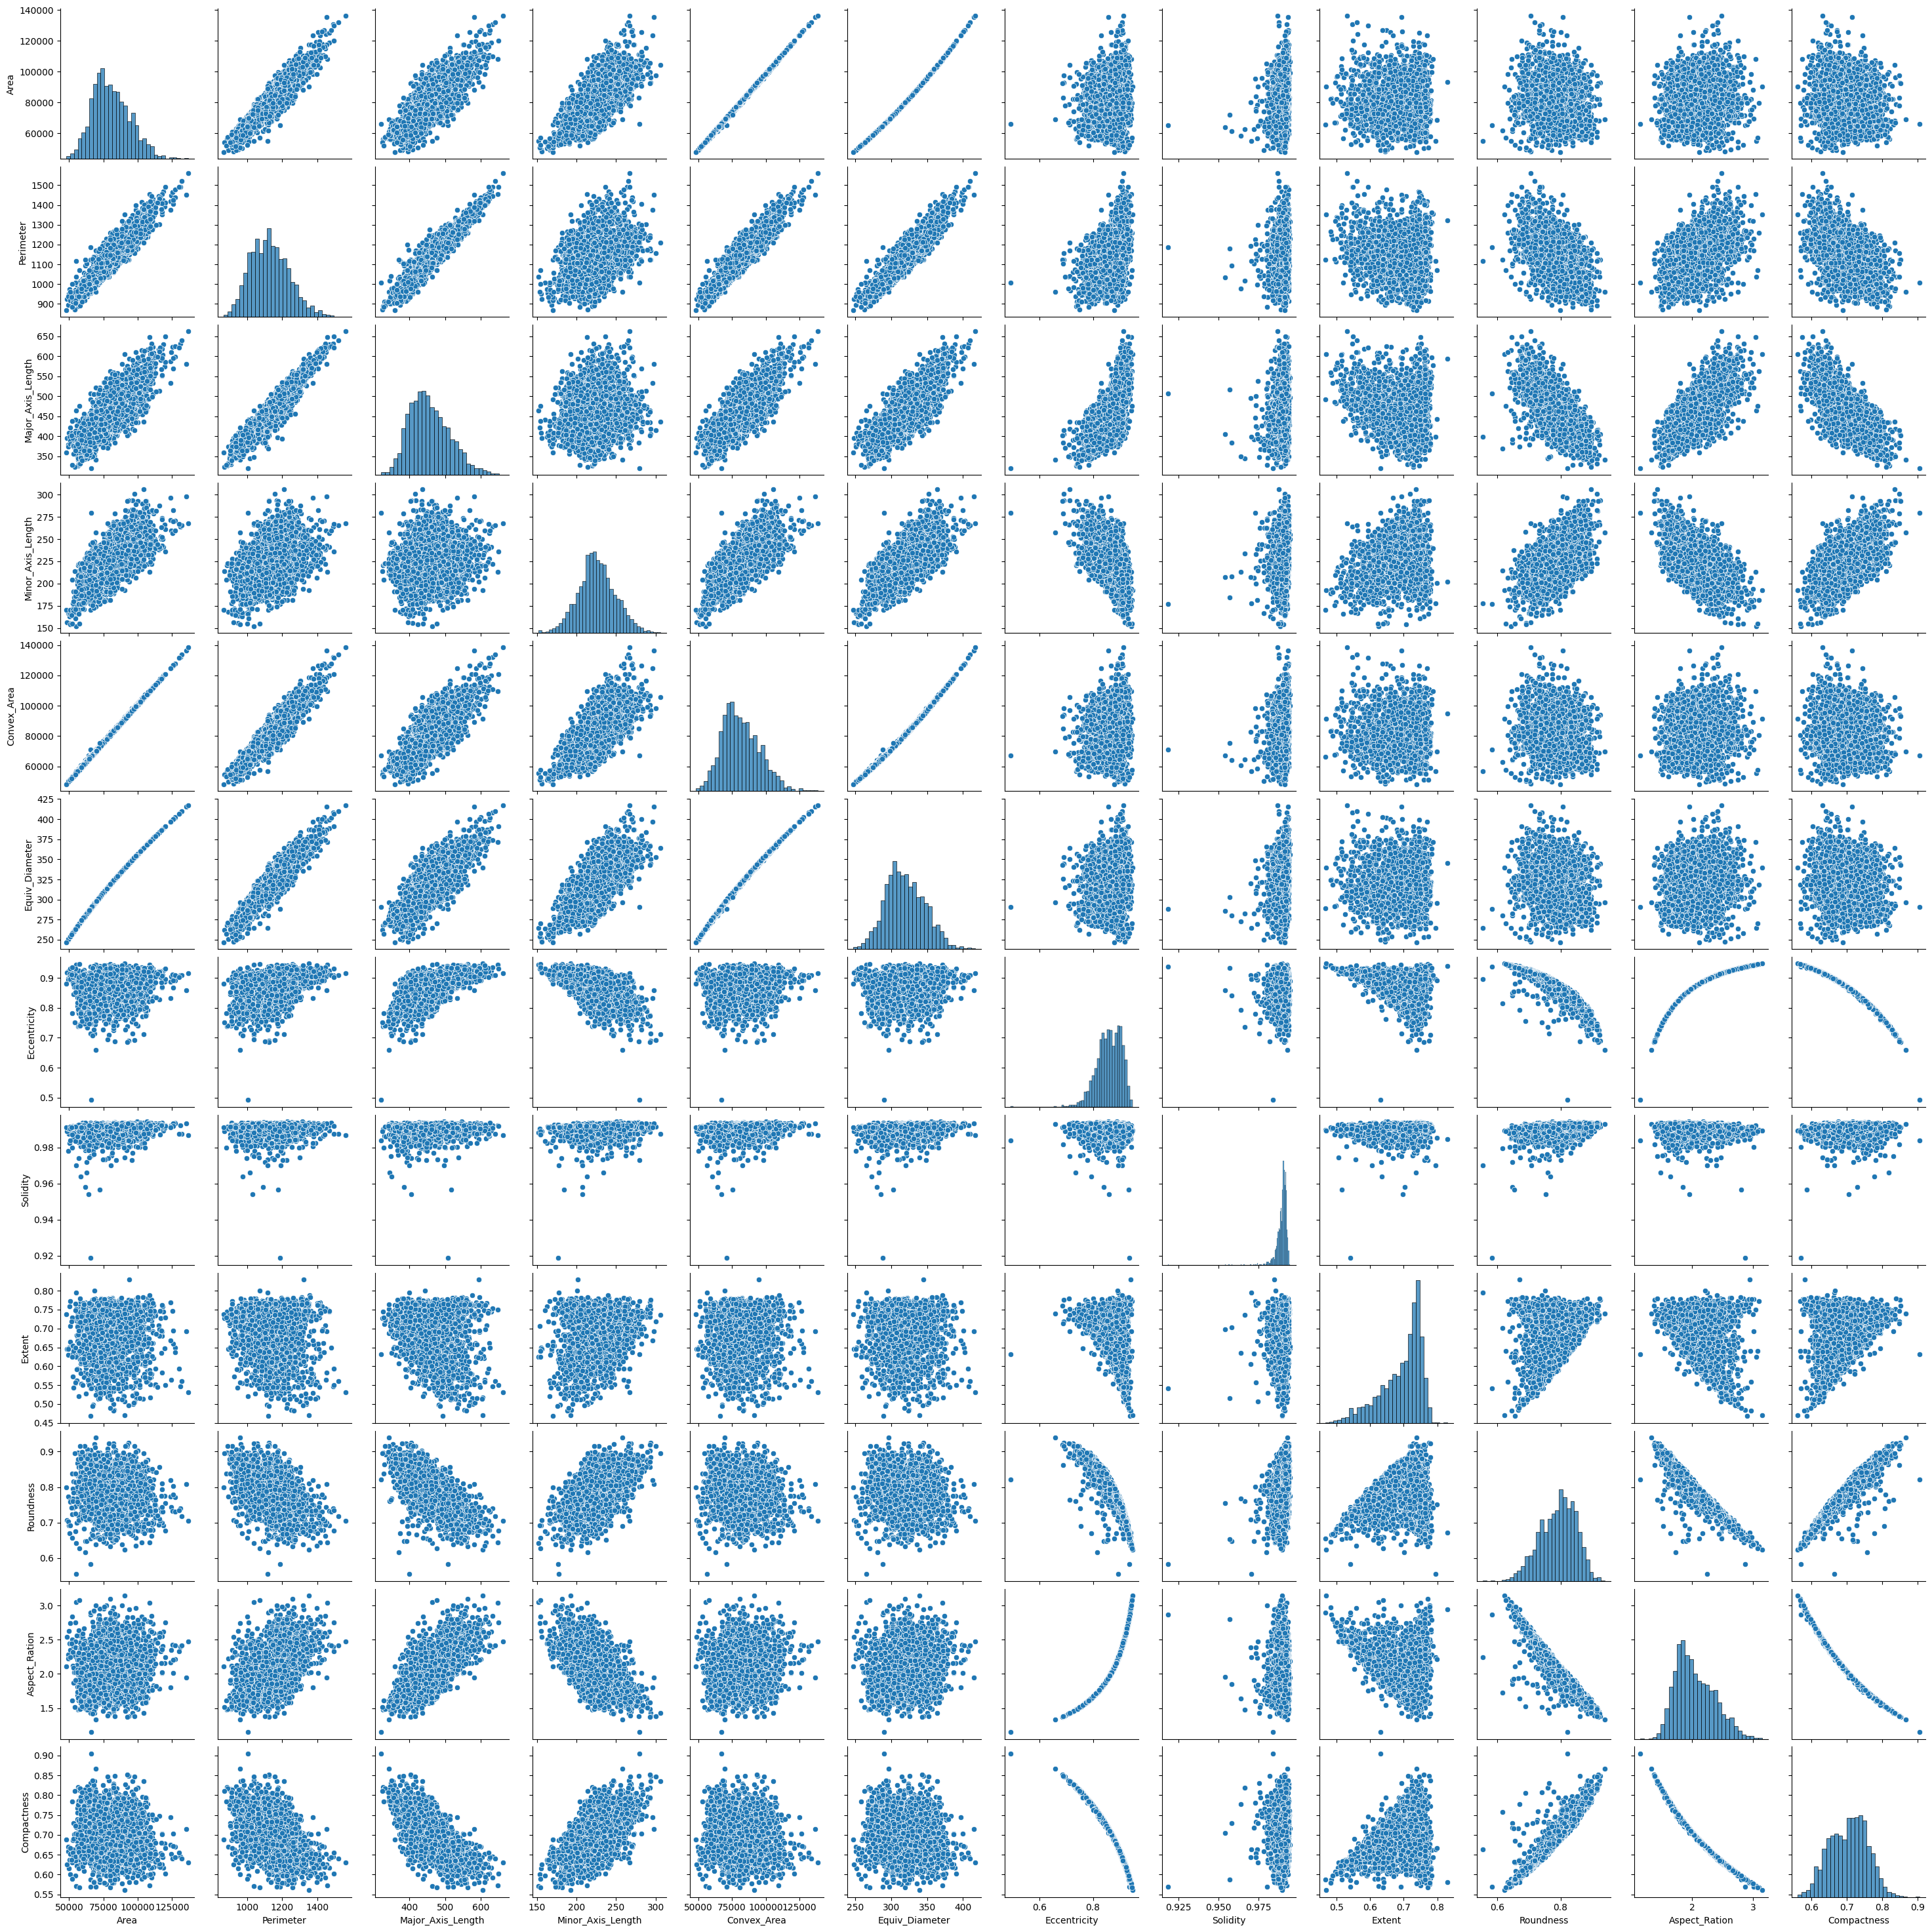

In [43]:
plt.figure(figsize=(15, 20))
sns.pairplot(data=df)
plt.show()

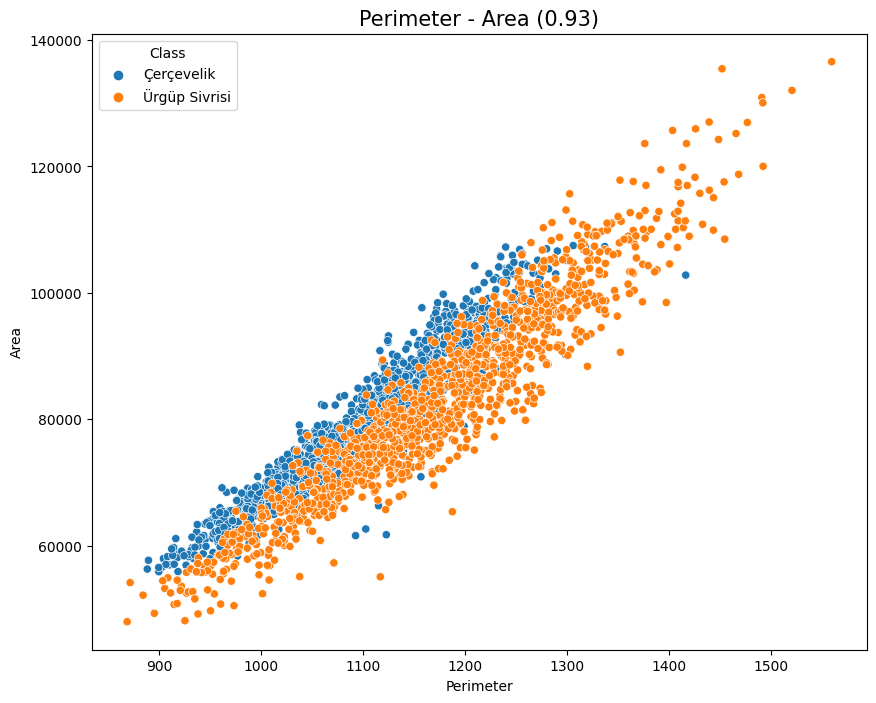

In [44]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Perimeter", y="Area", hue="Class")
plt.title("Perimeter - Area (0.93)", fontsize=15)
plt.show()

<p style="font-size:20px">
<i>
The linear relationship can easily be spotted but the classes are not well separated.


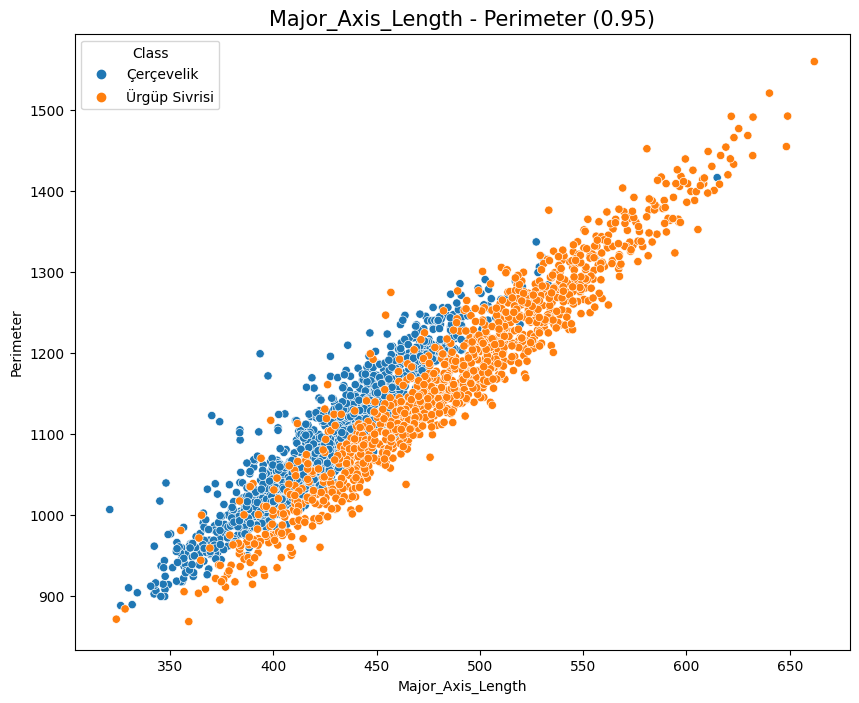

In [45]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Major_Axis_Length", y="Perimeter", hue="Class")
plt.title("Major_Axis_Length - Perimeter (0.95)", fontsize=15)
plt.show()

<p style="font-size:20px">
<i>
The linear relationship is clear and the classes are also well distributed.


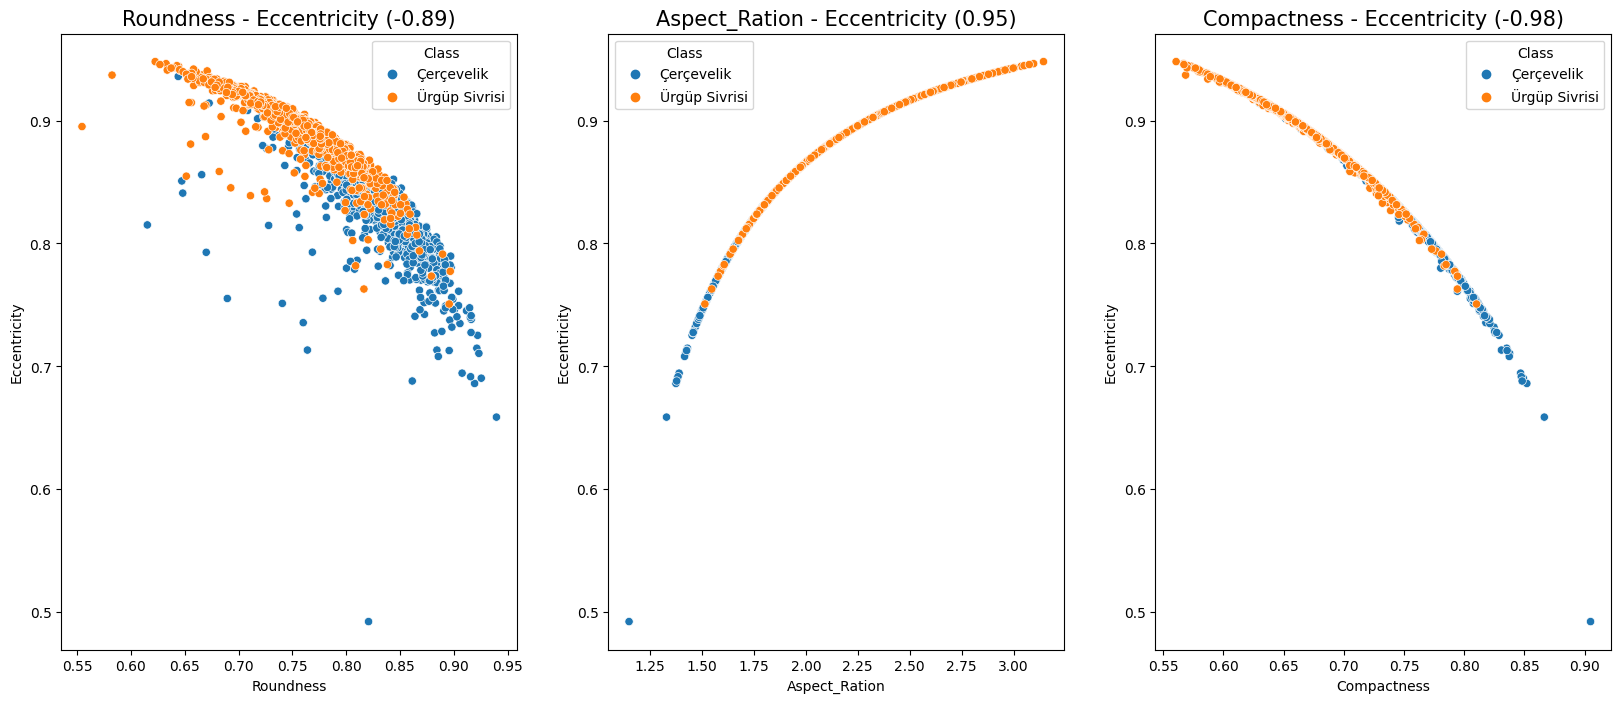

In [46]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="Roundness", y="Eccentricity", hue="Class")
plt.title("Roundness - Eccentricity (-0.89)", fontsize=15)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="Aspect_Ration", y="Eccentricity", hue="Class")
plt.title("Aspect_Ration - Eccentricity (0.95)", fontsize=15)

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="Compactness", y="Eccentricity", hue="Class")
plt.title("Compactness - Eccentricity (-0.98)", fontsize=15)

plt.show()

<p style="font-size:20px">
<i>
All these relations are linear but they are more shifted toward quadratic relations.


<p style="font-size:50px">
<b>
Model Training & Results


<p style="font-size:25px">
<b>
Data Preprocessing


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


<p style="font-size:20px">
<i>
Class seems to be categorical, so we will have to convert it into numerical form.


In [6]:
class_mapping = {}
reverse_class_mapping = {}
for i, name in enumerate(df["Class"].unique()):
    class_mapping[name] = i
    reverse_class_mapping[i] = name

df["Class"] = df["Class"].map(class_mapping)

<p style="font-size:20px">
<i>
Çerçevelik: 0 <br>
Ürgüp Sivrisi: 1


In [7]:
df

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     56276    888.242           326.1485           220.2388        56831   
1     76631   1068.146           417.1932           234.2289        77280   
2     71623   1082.987           435.8328           211.0457        72663   
3     66458    992.051           381.5638           222.5322        67118   
4     66107    998.146           383.8883           220.4545        67117   
...     ...        ...                ...                ...          ...   
2495  79637   1224.710           533.1513           190.4367        80381   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
0           267.6805        0.7376    0.9902  0.7453     0.8963   
1           312.3614        0.8275    0.9916  0.7151     0.8440   
2           301.9822        0.8749    0.9857  0.7400     0.7674   
3           290.8899        0.8123    0.9902  0.7396     0.8486   
4           290.1207        0.8187    0.9850  0.6752     0.8338   
...              ...           ...       ...     ...        ...   
2495        318.4289        0.9340    0.9907  0.4888     0.6672   
2496        297.7874        0.9101    0.9919  0.6002     0.7444   
2497        334.7199        0.8990    0.9920  0.7643     0.7549   
2498        319.1758        0.9130    0.9890  0.7374     0.7185   
2499        328.8485        0.8621    0.9901  0.7360     0.7933   

      Aspect_Ration  Compactness  Class  
0            1.4809       0.8207      0  
1            1.7811       0.7487      0  
2            2.0651       0.6929      0  
3            1.7146       0.7624      0  
4            1.7413       0.7557      0  
...             ...          ...    ...  
2495         2.7996       0.5973      1  
2496         2.4134       0.6433      1  
2497         2.2828       0.6599      1  
2498         2.4513       0.6359      1  
2499         1.9735       0.7104      1  

[2500 rows x 13 columns]

<p style="font-size:25px">
<b>
Data Splitting


In [8]:
# Splitted Data
y_full = df.pop("Class").to_numpy()
X_full = df.to_numpy()

# Scaled Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_full, test_size=0.2, shuffle=True, stratify=y_full, random_state=42
)

<p style="font-size:25px">
<b>
Models


<p style="font-size:20px">
<b>
Linear Regression (multiple)


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.10061007564673398
R-squared: 0.5969147610307132


<p style="font-size:20px">
<b>
Linear Regression (single)


In [11]:
X_single = df[['Perimeter']]

X_train, X_test, y_train, y_test = train_test_split(
    X_single, y_full, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.2103556015520402
R-squared: 0.15771509404814432


<p style="font-size:20px">
<i>
As we can see, the model is not performing well. The R2 score is very low and the model is not able to predict the class of the data.
This is because the data is not linearly separable and the model is not able to capture the non-linear relations between the features and the target.
<p style="font-size:20px">
<i>
Thus, we will have to use a non-linear model to capture the non-linear relations between the features and the target.
That being the Random Forest, but we will also try other models to see if they perform better than the Random Forest, like SVM and Logistic Regression.


In [51]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score
)
from sklearn.svm import SVC

<p style="font-size:20px">
<b>
Random Forest


In [30]:
# Splitting
rfc = RandomForestClassifier(max_depth=10, max_features=10, random_state=656)
rfc.fit(X_train, y_train)

# Prediction
pred = rfc.predict(X_test)

# Metrics
report = classification_report(y_test, pred)

cm = confusion_matrix(y_test, pred)
rfc_f1 = f1_score(y_test, pred)
rfc_Precision = precision_score(y_test, pred)
rfc_Recall = recall_score(y_test, pred)

# Show
print(report)
print("Confusion Matrix : \n{}\n".format(cm))
print("F1 Score         : {:.4}%\n".format(rfc_f1 * 100))
print("Precision Score  : {:.4}%\n".format(rfc_Precision * 100))
print("Recall Score     : {:.4}%".format(rfc_Recall * 100))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       260
           1       0.90      0.85      0.88       240

    accuracy                           0.89       500
   macro avg       0.89      0.88      0.89       500
weighted avg       0.89      0.89      0.89       500

Confusion Matrix : 
[[238  22]
 [ 35 205]]

F1 Score         : 87.79%

Precision Score  : 90.31%

Recall Score     : 85.42%


<p style="font-size:20px">
<b>
Logistic Regression


In [31]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Prediction
pred = lr.predict(X_test)

# Metrics
report = classification_report(y_test, pred)

cm = confusion_matrix(y_test, pred)
lr_f1 = f1_score(y_test, pred)
lr_Precision = precision_score(y_test, pred)
lr_Recall = recall_score(y_test, pred)

# Show
print(report)
print("Confusion Matrix : \n{}\n".format(cm))
print("F1 Score         : {:.4}%\n".format(lr_f1 * 100))
print("Precision Score  : {:.4}%\n".format(lr_Precision * 100))
print("Recall Score     : {:.4}%".format(lr_Recall * 100))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       260
           1       0.88      0.83      0.85       240

    accuracy                           0.86       500
   macro avg       0.87      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

Confusion Matrix : 
[[233  27]
 [ 41 199]]

F1 Score         : 85.41%

Precision Score  : 88.05%

Recall Score     : 82.92%


<p style="font-size:20px">
<b>
Support Vector Machine


In [32]:
clf = SVC(kernel="rbf", random_state=42)
clf.fit(X_train, y_train)

# Prediction
pred = clf.predict(X_test)

# Metrics
report = classification_report(y_test, pred)

cm = confusion_matrix(y_test, pred)
svm_f1 = f1_score(y_test, pred)
svm_Precision = precision_score(y_test, pred)
svm_Recall = recall_score(y_test, pred)

# Show
print(report)
print("Confusion Matrix : \n{}\n".format(cm))
print("F1 Score         : {:.4}%\n".format(svm_f1 * 100))
print("Precision Score  : {:.4}%\n".format(svm_Precision * 100))
print("Recall Score     : {:.4}%".format(svm_Recall * 100))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       260
           1       0.90      0.83      0.87       240

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500

Confusion Matrix : 
[[239  21]
 [ 40 200]]

F1 Score         : 86.77%

Precision Score  : 90.5%

Recall Score     : 83.33%


<p style="font-size:20px">
<b>
ADABoost


In [33]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

# Prediction
pred = adaboost.predict(X_test)

# Metrics
report = classification_report(y_test, pred)

cm = confusion_matrix(y_test, pred)
ab_f1 = f1_score(y_test, pred)
ab_Precision = precision_score(y_test, pred)
ab_Recall = recall_score(y_test, pred)

# Show
print(report)
print("Confusion Matrix : \n{}\n".format(cm))
print("F1 Score         : {:.4}%\n".format(ab_f1 * 100))
print("Precision Score  : {:.4}%\n".format(ab_Precision * 100))
print("Recall Score     : {:.4}%".format(ab_Recall * 100))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       260
           1       0.88      0.85      0.86       240

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500

Confusion Matrix : 
[[232  28]
 [ 36 204]]

F1 Score         : 86.44%

Precision Score  : 87.93%

Recall Score     : 85.0%


<p style="font-size:25px">
<b>
Model Comparision


In [34]:
names = ["RFC", "LR", "SVM", "AdaBoost"]
f1_scores = [rfc_f1, lr_f1, svm_f1, ab_f1]
precision_scores = [rfc_Precision, lr_Precision, svm_Precision, ab_Precision]
recall_scores = [rfc_Recall, lr_Recall, svm_Recall, ab_Recall]

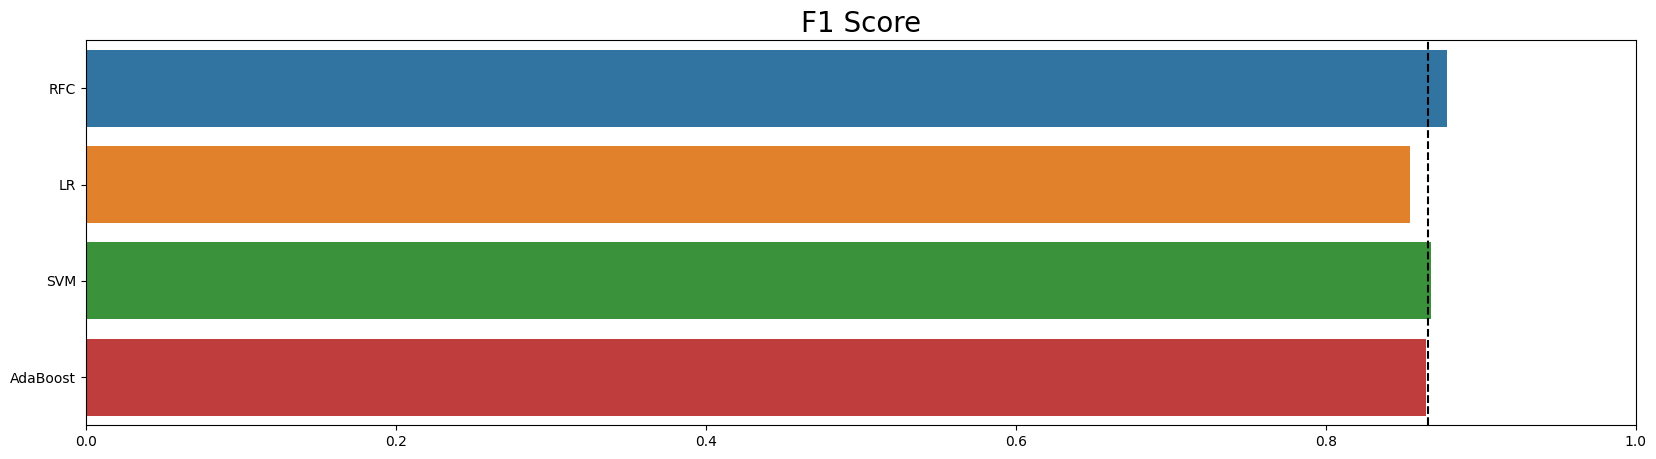

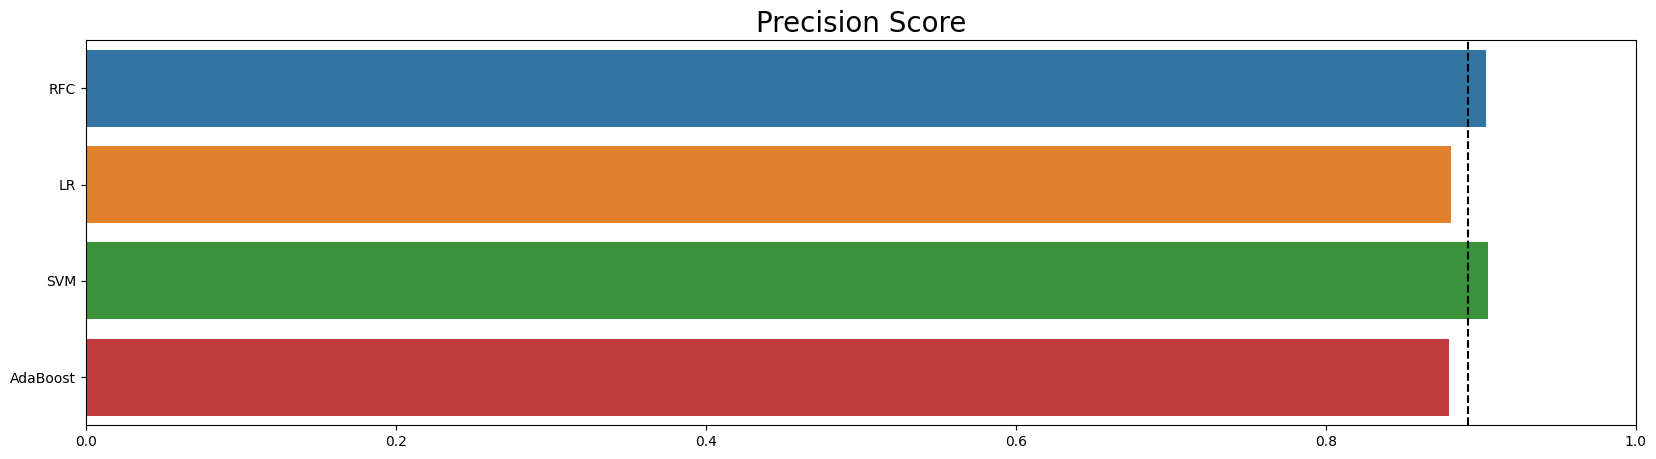

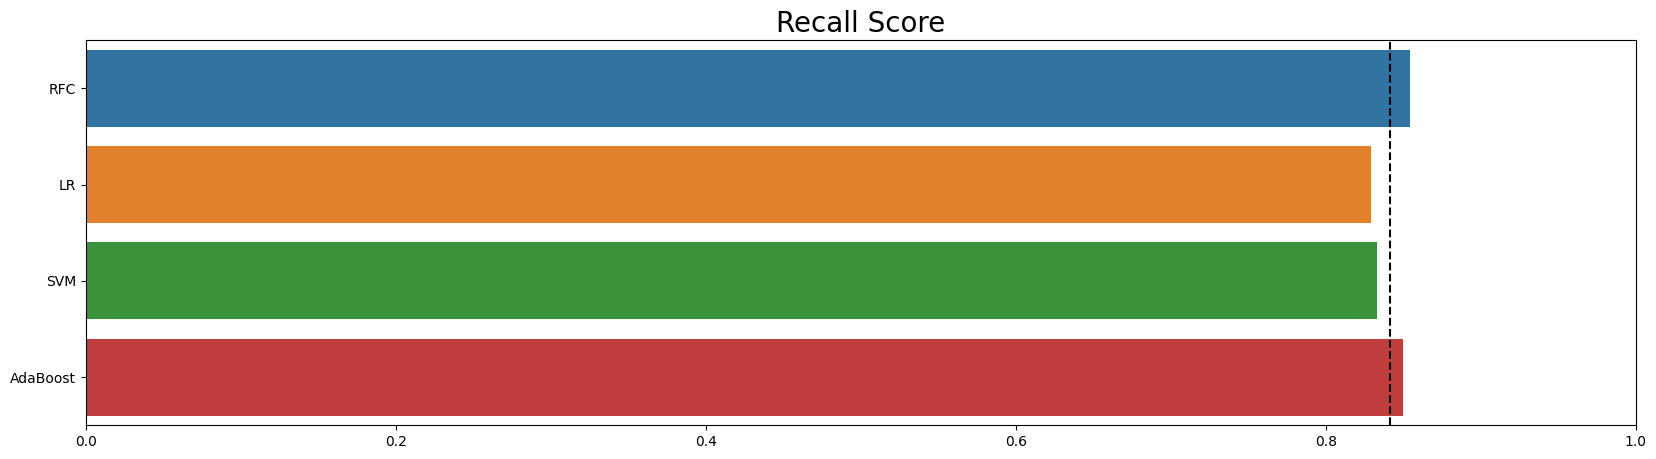

In [35]:
# Model Comaprision
plt.figure(figsize=(20, 5))
plt.title("F1 Score", fontsize=20)
sns.barplot(y=names, x=f1_scores)
plt.axvline(np.mean(f1_scores), color="k", linestyle="--")
plt.xlim([0, 1])
plt.show()

plt.figure(figsize=(20, 5))
plt.title("Precision Score", fontsize=20)
sns.barplot(y=names, x=precision_scores)
plt.axvline(np.mean(precision_scores), color="k", linestyle="--")
plt.xlim([0, 1])
plt.show()

plt.figure(figsize=(20, 5))
plt.title("Recall Score", fontsize=20)
sns.barplot(y=names, x=recall_scores)
plt.axvline(np.mean(recall_scores), color="k", linestyle="--")
plt.xlim([0, 1])
plt.show()

<p style="font-size:20px">
<b><i>
Random Forest is the best model for this dataset. It has the highest accuracy and the highest F1 score. It is also able to capture the non-linear relations between the features and the target.
</b>
</i>
</p>


<h3> <b> Performing HyperParameteric Tuning for RFC model


In [57]:
accuracy = []
for i in range(1, 20):
    rfc_model = RandomForestClassifier(max_depth=i, random_state=656)
    rfc_model.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))

print(f"Max Accuracy: {max(accuracy)} at max-depth: {accuracy.index(max(accuracy))+1}")

Max Accuracy: 0.886 at max-depth: 1


Inference: Our RFC model performs best with max-depth of 1


<p style="font-size:25px">
<b>
Now, let us compare the Random Forest model with the other models to see how it performs. We will be using LazyPredict to compare the models.


<p style="font-size:25px">
<b>
LazyPredict


In [41]:
from lazypredict.Supervised import LazyClassifier

In [47]:
clf = LazyClassifier(verbose=0, predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models


  3%|▎         | 1/29 [00:00<00:12,  2.16it/s]

100%|██████████| 29/29 [00:03<00:00,  7.87it/s]

[LightGBM] [Info] Number of positive: 960, number of negative: 1040
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2931
[LightGBM] [Info] Number of data points in the train set: 2000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480000 -> initscore=-0.080043
[LightGBM] [Info] Start training from score -0.080043


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BaggingClassifier                  0.89               0.89     0.89      0.89   
RandomForestClassifier             0.88               0.88     0.88      0.88   
ExtraTreesClassifier               0.88               0.88     0.88      0.88   
XGBClassifier                      0.88               0.88     0.88      0.88   
SVC                                0.88               0.88     0.88      0.88   
LGBMClassifier                     0.88               0.88     0.88      0.88   
RidgeClassifier                    0.88               0.87     0.87      0.88   
CalibratedClassifierCV             0.87               0.87     0.87      0.87   
RidgeClassifierCV                  0.87               0.87     0.87      0.87   
LinearSVC                          0.87               0.87     0.87      0.87   
QuadraticDiscriminantAnalysis      0.87               0.87     0.87      0.87   
AdaBoostClassifier                 0.87               0.87     0.87      0.87   
SGDClassifier                      0.87               0.87     0.87      0.87   
NuSVC                              0.87               0.87     0.87      0.87   
LinearDiscriminantAnalysis         0.87               0.87     0.87      0.87   
LogisticRegression                 0.86               0.86     0.86      0.86   
Perceptron                         0.86               0.86     0.86      0.86   
GaussianNB                         0.86               0.86     0.86      0.86   
KNeighborsClassifier               0.86               0.86     0.86      0.86   
NearestCentroid                    0.85               0.85     0.85      0.85   
BernoulliNB                        0.85               0.85     0.85      0.85   
LabelSpreading                     0.84               0.84     0.84      0.84   
LabelPropagation                   0.84               0.83     0.83      0.84   
ExtraTreeClassifier                0.82               0.82     0.82      0.82   
DecisionTreeClassifier             0.81               0.81     0.81      0.81   
PassiveAggressiveClassifier        0.78               0.78     0.78      0.78   
DummyClassifier                    0.52               0.50     0.50      0.36   

                               Time Taken  
Model                                      
BaggingClassifier                    0.51  
RandomForestClassifier               1.21  
ExtraTreesClassifier                 0.27  
XGBClassifier                        0.12  
SVC                                  0.09  
LGBMClassifier                       0.10  
RidgeClassifier                      0.01  
CalibratedClassifierCV               0.07  
RidgeClassifierCV                    0.02  
LinearSVC                            0.08  
QuadraticDiscriminantAnalysis        0.01  
AdaBoostClassifier                   0.46  
SGDClassifier                        0.02  
NuSVC                                0.17  
LinearDiscriminantAnalysis           0.01  
LogisticRegression                   0.04  
Perceptron                           0.01  
GaussianNB                           0.01  
KNeighborsClassifier                 0.02  
NearestCentroid                      0.01  
BernoulliNB                          0.01  
LabelSpreading                       0.19  
LabelPropagation                     0.15  
ExtraTreeClassifier                  0.01  
DecisionTreeClassifier               0.06  
PassiveAggressiveClassifier          0.01  
DummyClassifier                      0.01

Inference: As we can see from above, our traditionally trained Random Forest model is the second best model for this dataset, however as we can refer from the chart, Extra Trees, XGB, SVC and LGM performs, similarly better.


<b> Thereby, Let us proceed with FLAML


<p style="font-size:20px">
<b>
It's a library that performs Auto HyperParameter Tuning, and let us find the best model for our data. Let's see how it performs on this dataset, and compare with Traditional Random Forest that we did earlier, and compare this with other models which we ran through using LazyPredict.


<p style="font-size:25px">
<b>
FLAML


In [36]:
from flaml import AutoML

automl = AutoML()

<h3> <b> Applying FLAML with Accuracy matric </b> </h3>
<i> Basically it is a metric that is used to evaluate the performance of a model, with accuracy. </i>


In [59]:
automl.fit(
    X_train, y_train, task="classification", metric="accuracy", time_budget=500, verbose=0
)
print()

In [65]:
print("Best ML leaner:", automl.best_estimator)
print("Best hyperparmeter config:", automl.best_config)
print("Best r2 on validation data: {0:.4g}".format(1 - automl.best_loss))
print("Training duration of best run: {0:.4g} s".format(automl.best_config_train_time))

Best ML leaner: xgb_limitdepth
Best hyperparmeter config: {'n_estimators': 5, 'max_depth': 5, 'min_child_weight': 0.33731856669992066, 'learning_rate': 0.08555597333243325, 'subsample': 0.8997322323942395, 'colsample_bylevel': 0.7828587881266761, 'colsample_bytree': 0.8880306082820968, 'reg_alpha': 0.002955822804075845, 'reg_lambda': 0.30454133030648134}
Best r2 on validation data: 0.8905
Training duration of best run: 0.0333 s


In [63]:
models_tried = automl.estimator_list
models_tried


['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']

In [66]:
print(classification_report(y_test, automl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       260
           1       0.91      0.81      0.86       240

    accuracy                           0.87       500
   macro avg       0.88      0.87      0.87       500
weighted avg       0.88      0.87      0.87       500



<h3> <b> Applying FLAML with NDGC matric </b> </h3>
<i> Basically it is a metric that is used to evaluate the performance of a model. It is used to evaluate the ranking of the model. The higher the NDGC score, the better the model is performing. </i>


In [43]:
automl.fit(
    X_train, y_train, task="classification", metric="ndcg", time_budget=500, verbose=0
)
print()

In [44]:
print("Best ML leaner:", automl.best_estimator)
print("Best hyperparmeter config:", automl.best_config)
print("Best ndcg on validation data: {0:.4g}".format(1 - automl.best_loss))
print("Training duration of best run: {0:.4g} s".format(automl.best_config_train_time))

Best ML leaner: xgb_limitdepth
Best hyperparmeter config: {'n_estimators': 129, 'max_depth': 8, 'min_child_weight': 0.6582444292015495, 'learning_rate': 0.0009765625, 'subsample': 0.7622437266244039, 'colsample_bylevel': 0.688179974472514, 'colsample_bytree': 0.7753152864581245, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.022217288624125663}
Best ndcg on validation data: 0.976
Training duration of best run: 0.6921 s


In [45]:
print(classification_report(y_test, automl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       260
           1       0.94      0.79      0.86       240

    accuracy                           0.88       500
   macro avg       0.89      0.87      0.87       500
weighted avg       0.89      0.88      0.87       500



<p style="font-size:25px">
<b>
As we can see from the report XGBoost, comes on top, even better than the Random Forest model that we trained earlier. It has the highest accuracy and the highest F1 score. It is also able to capture the non-linear relations between the features and the target.


<h2 style="text-align:center"> <b> END OF CODE
